**Вступление:**
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. **Сервисом можно пользоваться:**


**без подписки**
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;


**с подпиской Ultra**
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.


Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

**Наша работа будет включать в себя 6 пунктов:**

- предобработка данных
- исследовательский анализ
- объединения данных, так как данные расположены в нескольких таблицах
- подсчет выручки
- проверка гипотез
- дополнительные исследования

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np

Подключаем все необходимые библиотеки для работы с данными.

- 1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:

In [2]:
users_data = pd.read_csv('/datasets/users_go.csv')

rides_data = pd.read_csv('/datasets/rides_go.csv')

subs_data = pd.read_csv('/datasets/subscriptions_go.csv')

- 1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [3]:
users_data.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


В датафрейме `users` есть следующие данные:
- user_id (id пользователя)
- name (имя)
- age (возраст)
- city (город проживания)
- subscription_type (тип подписки: бесплатная/ультра)

In [4]:
rides_data.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


В датафрейме `rides` есть следующие данные:
- user_id (id пользователя)
- distance (пройденная дистанция)
- duration (продолжительность поездки)
- date (дата поездки)

In [5]:
subs_data.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В датафрейме `subscriptions_go` есть следующие данные:
- subscription_type (тип подписки)
- minute_price (стоимость за минуту)
- start_ride_price (стоимость за старт)
- subscription_fee (стоимость подписки)

In [61]:
print(users_data.info())
print(rides_data.info())
print(subs_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
None
<cl

Вывели общую информацию о датафрейме, - с данными все на первый взгляд в порядке

**Вывод:** по структуре в этих датафреймах все понятно, будем работать дальше.

#### Шаг 2. Предобработка данных

- 2.1 Приведите столбец date к типу даты pandas.

In [6]:
rides_data.head(15)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
rides_data['date'].sort_values(ascending= False).unique()

array(['2021-12-30', '2021-12-29', '2021-12-28', '2021-12-27',
       '2021-12-26', '2021-12-25', '2021-12-24', '2021-12-23',
       '2021-12-22', '2021-12-21', '2021-12-20', '2021-12-19',
       '2021-12-18', '2021-12-17', '2021-12-16', '2021-12-15',
       '2021-12-14', '2021-12-13', '2021-12-12', '2021-12-11',
       '2021-12-10', '2021-12-09', '2021-12-08', '2021-12-07',
       '2021-12-06', '2021-12-05', '2021-12-04', '2021-12-03',
       '2021-12-02', '2021-12-01', '2021-11-30', '2021-11-29',
       '2021-11-28', '2021-11-27', '2021-11-26', '2021-11-25',
       '2021-11-24', '2021-11-23', '2021-11-22', '2021-11-21',
       '2021-11-20', '2021-11-19', '2021-11-18', '2021-11-17',
       '2021-11-16', '2021-11-15', '2021-11-14', '2021-11-13',
       '2021-11-12', '2021-11-11', '2021-11-10', '2021-11-09',
       '2021-11-08', '2021-11-07', '2021-11-06', '2021-11-05',
       '2021-11-04', '2021-11-03', '2021-11-02', '2021-11-01',
       '2021-10-31', '2021-10-30', '2021-10-29', '2021-

С этими данными все в порядке, только их тип - object, необходимо его перевести к типу datetime pandas, где Y-m-d

In [8]:
rides_data['date'].isna().count()

18068

Тут есть и _пустые_ строки, но с ними мы разберемся попозже.

In [9]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format = "%Y-%m-%d")

Переведи данные `rides_data['date']` к pandas типу Datetime. Проверим, что получилосб

In [10]:
rides_data.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

Все в порядке, тип данных поменялся.

- 2.2 Создайте новый столбец с номером месяца на основе столбца date.

In [11]:
rides_data['month'] = rides_data['date'].dt.month

In [12]:
rides_data.head(10)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
5,1,2770.890808,16.650138,2021-10-09,10
6,1,3039.020292,14.927879,2021-10-19,10
7,1,2842.118050,23.117468,2021-11-06,11
8,1,3412.690668,15.238072,2021-11-14,11
9,1,748.690645,15.041884,2021-11-22,11


Получилось добавить новый столбец с номерами месяца, когда была совершена поездка

- 2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [13]:
users_data.duplicated().sum()

31

In [14]:
rides_data.duplicated().sum()

0

In [15]:
subs_data.duplicated().sum()

0

Итак, пропуски имеются только в датасете users_data,- обработаем их.

In [16]:
users_data.duplicated().count()

1565

In [17]:
users_data.head(15)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [18]:
users_data = users_data.drop_duplicates()
users_data.duplicated().sum()

0

От пропусков избавились.

#### Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:

- 3.1 частота встречаемости городов;
- 3.2 соотношение пользователей с подпиской и без подписки;
- 3.3 возраст пользователей;
- 3.4 расстояние, которое пользователь преодолел за одну поездку;
- 3.5 продолжительность поездок.

- 3.1 частота встречаемости городов;

In [19]:
print(users_data.columns)
print(rides_data.columns)
print(subs_data.columns)

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')
Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')
Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')


Города есть только в users_data, их и будем рассматривать

<AxesSubplot:title={'center':'Частота встречаемости городов.'}, xlabel='Города', ylabel='Кол-во пользователей'>

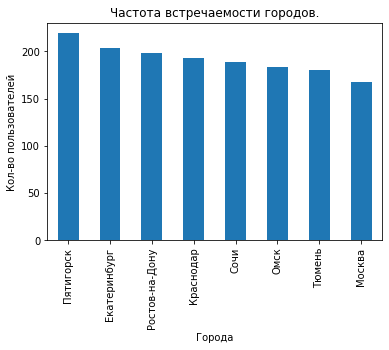

In [63]:
plt.xlabel('Города')
plt.ylabel('Кол-во пользователей')

users_data['city'].value_counts().plot(kind = 'bar', title = 'Частота встречаемости городов.')

In [62]:
users_data['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Здесь видно распределение пользователей по городам. Пятигорск - самое большое кол-во пользователей, Москва - наименьшее.

Разница между всеми городами не очень большая. Наибольшее значение - Пятигорск, наименьшее - Москва.
Посмотрим сколько эта разница будет в людях:

In [21]:
users_data['city'].value_counts().max() - users_data['city'].value_counts().min() 

51

Разница в 51 человека не сильно большая, хотя странно, что в Пятигорске этот сервис более популярный, нежели в Москве. Может это южная компания?

- 3.2 соотношение пользователей с подпиской и без подписки;

In [22]:
users_data['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

<AxesSubplot:title={'center':'Пользователи с подпиской ultra и без подписки free'}, xlabel='Тип подписки', ylabel='Кол-во пользователей'>

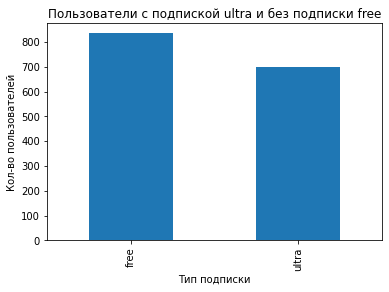

In [64]:
plt.xlabel('Тип подписки')
plt.ylabel('Кол-во пользователей')


users_data['subscription_type'].value_counts().plot(kind= 'bar', title = 'Пользователи с подпиской ultra и без подписки free')

In [24]:
# ratio - соотношение польз. free / ultra в %
ratio = users_data['subscription_type'].value_counts().max() / users_data['subscription_type'].value_counts().min()
print(f'Соотношение пользователей без подписки к пользователям с подпиской = ', ratio)


Соотношение пользователей без подписки к пользователям с подпиской =  1.1945636623748213


Пользователей без подписки больше на 19,5 % (на 100 человек)

- 3.3 возраст пользователей

<AxesSubplot:title={'center':'Возраст пользователей'}, xlabel='Возраст', ylabel='Кол-во пользователей'>

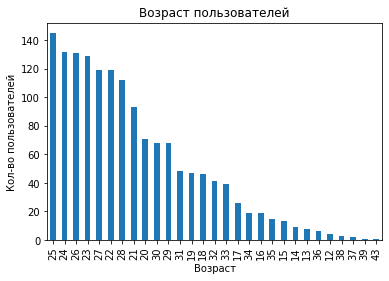

In [65]:
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')


users_data['age'].value_counts().plot(kind = 'bar', title = 'Возраст пользователей')

In [26]:
users_data['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

<AxesSubplot:title={'center':'Распределение возрастов пользователей'}, xlabel='Возраст', ylabel='Frequency'>

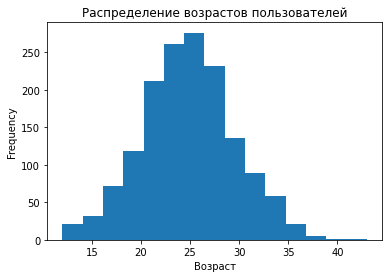

In [66]:
plt.xlabel('Возраст')
plt.ylabel('Кол-во пользователей')

users_data['age'].plot(kind = 'hist', bins = 15, title = 'Распределение возрастов пользователей')

Исходя из данных в графиках видно, что основная часть пользователей приходится на людей возрастом от 20 до 30 лет.

In [28]:
display(users_data['age'].median(), users_data['age'].mean())

25.0

24.903520208604956

In [29]:
users_data['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Основная часть приходится на возраст от 22 до 28 лет. А минимальный возраст - 12 лет, это немного странно, может быть аномалия (детям нельзя брать самокаты в аренду).

- 3.4 расстояние, которое пользователь преодолел за одну поездку;

In [30]:
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


<AxesSubplot:title={'center':'Расстояние в (м), пройденное пользователями'}, xlabel='Расстояние в метрах', ylabel='Frequency'>

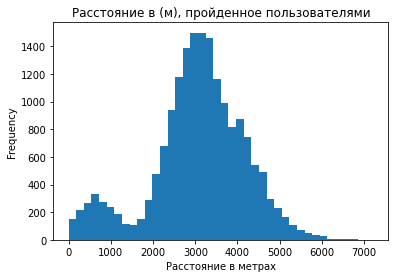

In [67]:
plt.xlabel('Расстояние в метрах')
plt.ylabel('Кол-во пользователей')


rides_data['distance'].plot(kind = 'hist', bins = 40, title = 'Расстояние в (м), пройденное пользователями')

In [32]:
rides_data['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

По этому графику видно, что в основном пользователи берут самокаты для преодоления больших дистанций (от 2.5 км до 3.7 км) - видимо, чтобы добраться до работы. Также есть пик на коротких дистанциях ( от 300 до 600 м) - люди берут самокаты на прогулках, чтобы просто покататься на них.

- 3.5 продолжительность поездок.

<AxesSubplot:title={'center':'Продолжительность поездок на самокатах'}, xlabel='Продолжительность поездки в минутах', ylabel='Frequency'>

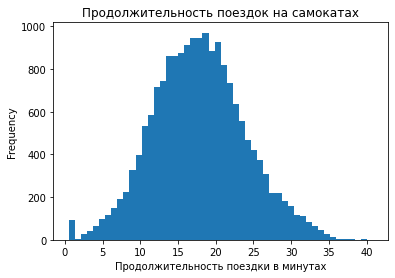

In [69]:
plt.xlabel('Продолжительность поездки в минутах')
plt.ylabel('Кол-во пользователей')

rides_data['duration'].plot(kind = 'hist', bins = 50, title = 'Продолжительность поездок на самокатах')

In [34]:
rides_data['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Такое распределение, как на графике, имеет место быть. В основном средняя поездка длится от 13 до 21 минут, есть также пик и на коротких (около минуты), такое возможно, но выглядит как выброс в данных.

<AxesSubplot:title={'center':'Продолжительность поездки на самокатах'}, ylabel='Продолжительность в минутах'>

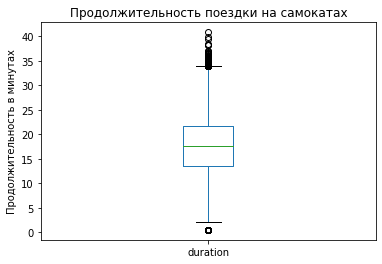

In [71]:
plt.ylabel('Продолжительность в минутах')

rides_data['duration'].plot(kind = 'box', title = 'Продолжительность поездки на самокатах')

Да, продолжительность поездки лежит в пределах от 13 до 21 минут, а также есть и выбивающиеся значения, от 35 и выше и меньше одной минуты.

# Шаг 4. Объединение данных

- 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [36]:
print(users_data.columns)
print(rides_data.columns)
print(subs_data.columns)

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')
Index(['user_id', 'distance', 'duration', 'date', 'month'], dtype='object')
Index(['subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee'],
      dtype='object')


users_data и subs_data объединим по 'subscription_type', а rides_data с остальными по user_id

In [37]:
data_extra = users_data.merge(subs_data, how = 'outer', on = 'subscription_type')
data_extra.head()

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,6,0,199
1,2,Станислав,31,Омск,ultra,6,0,199
2,3,Алексей,20,Москва,ultra,6,0,199
3,4,Константин,26,Ростов-на-Дону,ultra,6,0,199
4,5,Адель,28,Омск,ultra,6,0,199


In [74]:
data = data_extra.merge(rides_data, how = 'outer', on ='user_id')
print(data_extra.isna().sum())
data.head(15)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


In [73]:
print(users_data.shape[0],rides_data.shape[0],subs_data.shape[0],data.shape[0])
print(users_data.isna().sum(), rides_data.isna().sum(), subs_data.isna().sum())

1534 18068 2 18068
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64 user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64 subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Все получилось, в users_data мы хранили данные о пользователях, а в rides_data были данные о поездках, которые прикрепили к таблицы по user_id, ( у 1-го пользователя может быть больше одной поездки), поэтому количество строк увеличилось. 
Объединение таблиц произошло успешно, пропусков не имеется.

- 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [40]:
data_free = data.loc[data['subscription_type'] == 'free']
data_ultra = data.loc[data['subscription_type'] == 'ultra']

In [41]:
data_free.head(15)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
6500,700,Айдар,22,Омск,free,8,50,0,2515.690719,14.944286,2021-01-02,1
6501,700,Айдар,22,Омск,free,8,50,0,846.932642,16.234663,2021-02-01,2
6502,700,Айдар,22,Омск,free,8,50,0,4004.434142,20.016628,2021-02-04,2
6503,700,Айдар,22,Омск,free,8,50,0,1205.911290,9.782872,2021-02-10,2
6504,700,Айдар,22,Омск,free,8,50,0,3047.379435,17.427673,2021-02-14,2
6505,700,Айдар,22,Омск,free,8,50,0,4342.002254,22.368009,2021-02-23,2
6506,700,Айдар,22,Омск,free,8,50,0,3798.334905,18.243756,2021-03-03,3
6507,700,Айдар,22,Омск,free,8,50,0,2984.551206,15.424899,2021-04-09,4
6508,700,Айдар,22,Омск,free,8,50,0,3360.107141,16.765497,2021-06-12,6
6509,700,Айдар,22,Омск,free,8,50,0,2567.543847,11.312160,2021-06-23,6


In [42]:
data_ultra.head(15)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,6,0,199,748.690645,15.041884,2021-11-22,11


In [43]:
print(data_free['subscription_type'].unique())
print(data_ultra['subscription_type'].unique())

['free']
['ultra']


Получилось создать два новых датафрейма, один с людьми без подписки (data_free), а другой с подписками (data_ultra)

- 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

- **Пользователи без подписки**

<AxesSubplot:title={'center':'Длительность поездки'}, xlabel='Длительность поездки без подписки', ylabel='Frequency'>

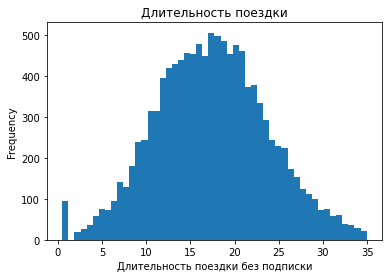

In [75]:
import matplotlib.pyplot as plt

plt.xlabel('Длительность поездки без подписки')
plt.ylabel('Кол-во пользователей')
data_free['duration'].plot(kind = 'hist' , bins = 50, title = 'Длительность поездки')

<AxesSubplot:title={'center':'Дистанция за поездку в м.'}, xlabel='Дистанция, пройденная пользователями в поездке', ylabel='Frequency'>

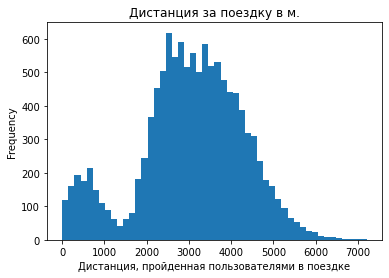

In [77]:
plt.xlabel('Дистанция, пройденная пользователями в поездке')
data_free['distance'].plot(kind = 'hist', bins = 50, title = 'Дистанция за поездку в м.')

- **Пользователи с подпиской**

<AxesSubplot:title={'center':'Длительность поездки в м.'}, xlabel='Длительность поездки в м.', ylabel='Frequency'>

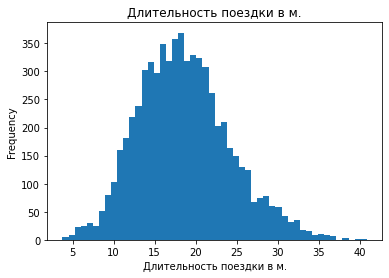

In [46]:
plt.xlabel('Длительность поездки в м.')
data_ultra['duration'].plot(kind = 'hist', bins = 50, title = 'Длительность поездки в м.' )

<AxesSubplot:title={'center':'Дистанция поездки в м.'}, xlabel='Дистанция поездки в м.', ylabel='Frequency'>

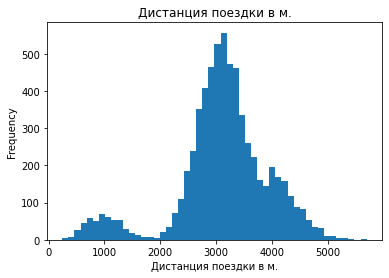

In [47]:
plt.xlabel('Дистанция поездки в м.')
data_ultra['distance'].plot(kind = 'hist', bins = 50, title = 'Дистанция поездки в м.' )

-Можно сказать, что для **free** - средняя длительность составляет от 10 до 25 мин, а дистанция - (первый пик) до 1 км, и от 2 до 4,5 км (второй пик). -Для людей с **ultra** подпиской - средняя длительность составляет от 10 до 23 мин, а средняя дистанция - (первый пик) от 300 м. до 1.5 км и от 2.5 км до 4 км (второй пик)

Также по графику видно, что пик для людей с подпиской уже, чем у людей без подписки. Это скорее всего связано с тем, что те люди, которые покупают подписку, добираются на самокатах до учебы/работы, и им выгоднее пользоваться подпиской, нежели **free** 

#### Шаг 5. Подсчёт выручки

- 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Заменим значения для ячеек ultra и free на 1 и 0 соответственно

In [48]:
data['subscription_type'] = data['subscription_type'].apply(lambda x: 1 if x == 'ultra' else 0)
data.head(15)

,user_id,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,distance,duration,date,month
0,1,Кира,22,Тюмень,1,6,0,199,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,1,6,0,199,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,1,6,0,199,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,1,6,0,199,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,1,6,0,199,4028.687306,26.265803,2021-08-28,8
5,1,Кира,22,Тюмень,1,6,0,199,2770.890808,16.650138,2021-10-09,10
6,1,Кира,22,Тюмень,1,6,0,199,3039.020292,14.927879,2021-10-19,10
7,1,Кира,22,Тюмень,1,6,0,199,2842.118050,23.117468,2021-11-06,11
8,1,Кира,22,Тюмень,1,6,0,199,3412.690668,15.238072,2021-11-14,11
9,1,Кира,22,Тюмень,1,6,0,199,748.690645,15.041884,2021-11-22,11


Заменили

In [49]:
data_total = data.pivot_table(
            index = ['user_id', 'month'],
            values = ['distance', 'duration', 'name', 'subscription_type'],
            aggfunc = {
                'distance' : 'sum',
                'duration' : 'sum',
                'name' : 'count',
                'subscription_type' : 'mean'
            })
data_total.head(15)
#print(data_total['subscription_type'].unique())

distance   duration  name  subscription_type
user_id month                                                  
1       1       7027.511294  41.416640     2                  1
        4        754.159807   6.232113     1                  1
        8       6723.470560  44.776802     2                  1
        10      5809.911100  31.578017     2                  1
        11      7003.499363  53.397424     3                  1
        12      6751.629942  27.203912     2                  1
2       3      10187.723006  60.959959     3                  1
        4       6164.381824  39.048633     2                  1
        6       3255.338202  13.851127     1                  1
        7       6780.722964  46.170157     2                  1
        8        923.007439   6.914760     1                  1
        10      2824.636598  18.779128     1                  1
        12      3828.248580  11.920514     1                  1
3       1       3061.777147  12.654443     1                  1
        2       5421.152016  37.568637     2                  1

Округляем поездки

In [50]:
import numpy as np

data_total['duration'] = np.ceil(data_total['duration'])
data_total.head(15)


distance  duration  name  subscription_type
user_id month                                                 
1       1       7027.511294      42.0     2                  1
        4        754.159807       7.0     1                  1
        8       6723.470560      45.0     2                  1
        10      5809.911100      32.0     2                  1
        11      7003.499363      54.0     3                  1
        12      6751.629942      28.0     2                  1
2       3      10187.723006      61.0     3                  1
        4       6164.381824      40.0     2                  1
        6       3255.338202      14.0     1                  1
        7       6780.722964      47.0     2                  1
        8        923.007439       7.0     1                  1
        10      2824.636598      19.0     1                  1
        12      3828.248580      12.0     1                  1
3       1       3061.777147      13.0     1                  1
        2       5421.152016      38.0     2                  1

- 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

Помесячная выручка считается по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [51]:
data_total['income'] = 50 * data_total['name'] + 8 * data_total['duration'] + data_total['subscription_type'] * (-2*data_total['duration']-50*data_total['name']+199)
data_total.head(15)

distance  duration  name  subscription_type  income
user_id month                                                         
1       1       7027.511294      42.0     2                  1   451.0
        4        754.159807       7.0     1                  1   241.0
        8       6723.470560      45.0     2                  1   469.0
        10      5809.911100      32.0     2                  1   391.0
        11      7003.499363      54.0     3                  1   523.0
        12      6751.629942      28.0     2                  1   367.0
2       3      10187.723006      61.0     3                  1   565.0
        4       6164.381824      40.0     2                  1   439.0
        6       3255.338202      14.0     1                  1   283.0
        7       6780.722964      47.0     2                  1   481.0
        8        923.007439       7.0     1                  1   241.0
        10      2824.636598      19.0     1                  1   313.0
        12      3828.248580      12.0     1                  1   271.0
3       1       3061.777147      13.0     1                  1   277.0
        2       5421.152016      38.0     2                  1   427.0

In [52]:
data_total['income'].describe()

count    11331.000000
mean       340.100344
std        151.127485
min         58.000000
25%        234.000000
50%        319.000000
75%        412.000000
max       1428.000000
Name: income, dtype: float64

В среднем прибыль с одного человека примерно от 230 до 480 рублей в месяц.

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

- 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
- 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
- 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
- 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

- 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [53]:
import scipy.stats as st

Подключаем билиотеку для изучения гипотез

H0 - пользователи с подпиской тратят времени столько же, сколько и без подписки
H1 - пользователи с подпиской тратят времени больше, чем пользователи без подписки

Проверим эти гипотезы.

In [54]:
st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative='greater',equal_var=True)

Ttest_indResult(statistic=12.241203729044017, pvalue=1.2804098316645618e-34)

Значение p-value очень маленькое, поэтому мы смело можем отвергнуть нулевую гипотезу и сказать, что ultra подписчики тратят времени на поездки больше и "выгоднее" для компании

- 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0 - пользователи с подпиской проезжают больше или 3130 метров
H1 - пользователи с подпиской проезжают менее 3130 метров

In [55]:
st.ttest_1samp(data_ultra['distance'], popmean = 3130, alternative = 'less')

Ttest_1sampResult(statistic=-1.402123166869486, pvalue=0.08046311521502146)

В данном случае p-value принимает значение около 8%, что означает, что мы не можем на 100% отвергать нулевую гипотезу, если у нас уровень значимости 5% или 1%.

- 6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0 - месячная выручка от ultra меньше, как и free
H1 - месячная выручка от ultra такая же или выше, чем free

In [56]:
data_total['subscription_type'].unique()

array([1, 0])

In [57]:
st.ttest_ind(data_total.loc[data_total['subscription_type']==1,'income'],
              data_total.loc[data_total['subscription_type']==0,'income'],
              alternative='greater',
             equal_var=False
              )

Ttest_indResult(statistic=14.04341703675686, pvalue=1.0718729651261336e-44)

Значение p-value очень маленькое, поэтому можно отвергнуть нулевую гипотезу и считать, что месячная выручка от людей с подпиской ultra выше, чем с free

- 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Тут у нас есть два датасета с изменениями "до" и "после" обновления. Поэтому нам понадобится тест st.ttest_rel, который нужен для получения равенства среднего значения генеральной совокупности до и после изменения.

#### Шаг 7. Распределения

- 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

In [58]:
from math import sqrt

n = 1100  #1000 подписчиков + 100 взяли подписку
res = 1 # шанс 100
p = 0.1 # шанс 10
while res > 0.05: # будем считать, пока res не станет примерно 5%, как в условии
    n += 1 # будем "подбирать" значение
    
    mu = n * p  # параметры нормального распределения
    sigma = sqrt(n*p*(1-p)) # считаем дисперсию ручками
    
    distr = st.norm(mu, sigma) # строим распределение
    
    res = distr.cdf(100) # как минимум 100 клиентов (левый хвост)
print(res)
print(n)

0.04971489312694162
1169


Получили значение 1169, - столько нужно раздать промокодов, чтобы как минимум 100 человек активировали подписку.

- 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [59]:
from math import sqrt
from scipy import stats as st
n = 1000000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1-p))

distr = st.norm(mu,sigma)

result = distr.cdf(399500)
result


0.15371708296369768

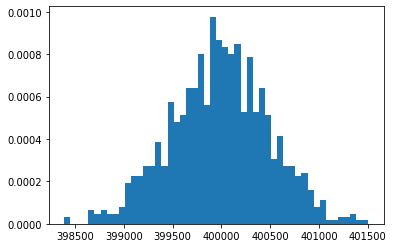

In [60]:
gr = np.random.normal(mu,sigma,1000)

plt.hist(gr, 50, density = True)
plt.show()

Странно, что на графике получаются такие значения. result показал, что вероятность получить менее 399 тысяч открывших клиентов - 15 %

Заключение

Были проанализированы данные о пользователях из многих городов, а также о данных каждой из поездок. В ходе работы был проведен анализ данных, проверены или опровергнуты гипотезы, - всё это сможет помочь компании получить большую выгоду.

**Краткие выводы:**
- Пользователи у которых есть подписка, приносят больше прибыли компании
- В среднем люди проезжают около 3 км
- Пользователи с активной подпиской тратят больше времени во время поездки на самокате.
- Компании выгодно создавать новые акции и привлекать больше клиентов, а также стараться делать так, чтобы как можно больше пользователей переходили на платные подписки.

**Рекомендации к компании:**
- Создавать больше новых акций
- Можно добавить реферальные программы (км в подарок, пригласи друга, и т.д.)